In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

#### Load your zillow dataset.

In [3]:
df = wrangle.get_zillow_data()

csv file found and loaded



In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [6]:
train, validate, test = wrangle.prep_zillow(df)

In [7]:
train.head()

,bedrooms,bathrooms,area,propertyvalue,yearbuilt,taxamount,county,Orange,Ventura
1571799,4,2.5,2987,885000,2006.0,13617.38,Orange,1,0
1723554,3,2.0,3013,489511,1977.0,5768.57,LA,0,0
718174,4,3.0,2572,390915,1986.0,4944.11,LA,0,0
1663206,3,1.0,1589,321758,1959.0,4031.78,LA,0,0
1087892,3,2.0,1727,231737,1962.0,2708.80,Ventura,0,1


#### Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

#### Here is some sample code to get you started:

    from sklearn.linear_model import LinearRegression
    
    # assuming X and y are already defined
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)

#### Modify and add to the code above as necessary for it to work with the zillow dataset.

In [9]:
train.head()

,bedrooms,bathrooms,area,propertyvalue,yearbuilt,taxamount,county,Orange,Ventura
1571799,4,2.5,2987,885000,2006.0,13617.38,Orange,1,0
1723554,3,2.0,3013,489511,1977.0,5768.57,LA,0,0
718174,4,3.0,2572,390915,1986.0,4944.11,LA,0,0
1663206,3,1.0,1589,321758,1959.0,4031.78,LA,0,0
1087892,3,2.0,1727,231737,1962.0,2708.80,Ventura,0,1


In [13]:
train = train[['area','propertyvalue']].copy()

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression().fit(train[['area']], train.propertyvalue)
predictions = model.predict(train[['area']])

In [16]:
predictions

array([580049.24806397, 584607.35349842, 507294.8728601 , ...,
       379141.98545281, 302881.37529937, 331807.81363343])

In [17]:
train['yhat'] = predictions

In [18]:
train.head()

,area,propertyvalue,yhat
1571799,2987,885000,580049.248064
1723554,3013,489511,584607.353498
718174,2572,390915,507294.872860
1663206,1589,321758,334963.425088
1087892,1727,231737,359156.446240


#### Plot the residuals for the linear regression model that you made.

In [27]:
train['residuals'] = train.yhat - train.propertyvalue

In [28]:
train.head()

,area,propertyvalue,yhat,residuals
1571799,2987,885000,580049.248064,-304950.751936
1723554,3013,489511,584607.353498,95096.353498
718174,2572,390915,507294.872860,116379.872860
1663206,1589,321758,334963.425088,13205.425088
1087892,1727,231737,359156.446240,127419.446240


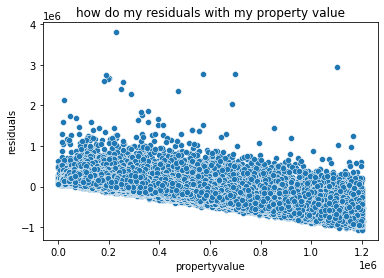

In [29]:
sns.scatterplot(data=train, y='residuals', x='propertyvalue')
plt.title('how do my residuals with my property value')
plt.show()

#### Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [31]:
train.head()

,area,propertyvalue,yhat,residuals
1571799,2987,885000,580049.248064,-304950.751936
1723554,3013,489511,584607.353498,95096.353498
718174,2572,390915,507294.872860,116379.872860
1663206,1589,321758,334963.425088,13205.425088
1087892,1727,231737,359156.446240,127419.446240


In [30]:
from sklearn.metrics import mean_squared_error

In [52]:
MSE = mean_squared_error(train.propertyvalue, train.yhat)
MSE

42992181337.3815

In [37]:
SSE = MSE * len(train)
SSE

5.244624799783437e+16

In [39]:
RMSE = MSE ** .5
RMSE

207345.56020658242

In [43]:
ESS = sum((train.yhat - train.propertyvalue.mean())**2)
ESS

1.9763181828794024e+16

In [44]:
TSS = ESS + SSE
TSS

7.220942982662838e+16

#### Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [47]:
train['baseline'] = train.propertyvalue.mean()

In [48]:
train.head()

,area,propertyvalue,yhat,residuals,baseline
1571799,2987,885000,580049.248064,-304950.751936,363532.067232
1723554,3013,489511,584607.353498,95096.353498,363532.067232
718174,2572,390915,507294.872860,116379.872860,363532.067232
1663206,1589,321758,334963.425088,13205.425088,363532.067232
1087892,1727,231737,359156.446240,127419.446240,363532.067232


In [53]:
MSE_baseline = mean_squared_error(train.propertyvalue, train.baseline)
MSE_baseline

59192812067.367615

In [55]:
SSE_baseline = MSE_baseline * len(train)
SSE_baseline

7.220942982660589e+16

In [57]:
RMSE_baseline = MSE_baseline ** .5
RMSE_baseline

243295.7296529629

#### Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [58]:
SSE

5.244624799783437e+16

In [59]:
SSE_baseline

7.220942982660589e+16

In [63]:
if SSE < SSE_baseline:
    print('my model is better than baseline!')
else:
    print('my model is not better than baseline!')

my model is better than baseline!


#### What is the amount of variance explained in your model?

In [68]:
ESS/TSS

0.27369253401175636

In [64]:
from sklearn.metrics import r2_score

In [65]:
r2_score(train.propertyvalue, train.yhat)

0.27369253401153004

In [66]:
train.head()

,area,propertyvalue,yhat,residuals,baseline
1571799,2987,885000,580049.248064,-304950.751936,363532.067232
1723554,3013,489511,584607.353498,95096.353498,363532.067232
718174,2572,390915,507294.872860,116379.872860,363532.067232
1663206,1589,321758,334963.425088,13205.425088,363532.067232
1087892,1727,231737,359156.446240,127419.446240,363532.067232


#### Is your model better than the baseline model?

A: my model is better than baseline, however, it isn't that great

#### Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [72]:
def plot_residuals(y, yhat):
    residuals = yhat - y
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

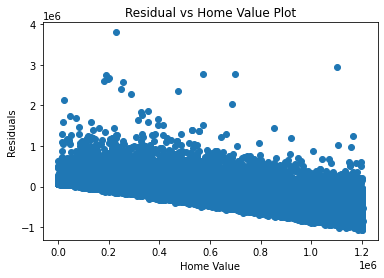

In [73]:
plot_residuals(train.propertyvalue, train.yhat)

In [74]:
def regression_errors(y, yhat):
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
    
    return SSE, ESS, TSS, MSE, RMSE

In [75]:
regression_errors(train.propertyvalue, train.yhat)

(5.244624799783437e+16,
 1.9763181828795228e+16,
 7.22094298266296e+16,
 42992181337.3815,
 207345.56020658242)

In [76]:
def baseline_mean_errors(y):
    baseline = np.repeat(y.mean(), len(y))
    
    MSE = mean_squared_error(y, baseline)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    return SSE, MSE, RMSE

In [78]:
baseline_mean_errors(train.propertyvalue)

(7.220942982660589e+16, 59192812067.367615, 243295.7296529629)